In [3]:
pip install pandas scikit-learn matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import nltk
from nltk.corpus import stopwords
import string

# Download stopwords (only once)
nltk.download('stopwords')

# Load dataset
df = pd.read_csv('C:\\Users\\Student\\Downloads\\IMDB Dataset.csv')

# Quick look at data
print(df.head())

# Preprocessing function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in text.split() if word not in stop_words]
    return " ".join(filtered_words)

# Apply preprocessing
df['review'] = df['review'].apply(preprocess_text)

# Vectorize text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['review'])

# Labels (convert positive/negative to 1/0)
y = df['sentiment'].map({'positive': 1, 'negative': 0})

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Student\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
Accuracy: 0.8617
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      4961
           1       0.88      0.84      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Student\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


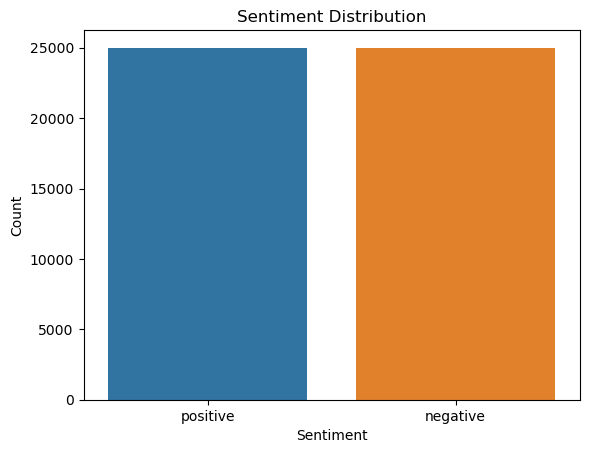

Accuracy: 0.8617
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      4961
           1       0.88      0.84      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



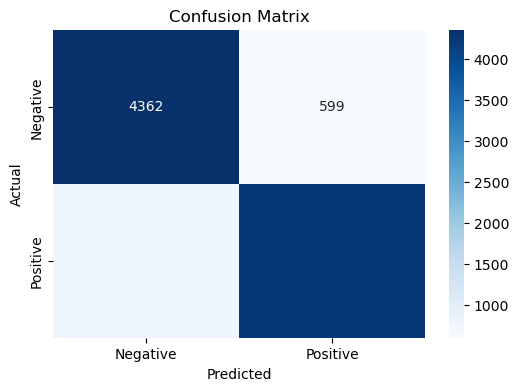

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


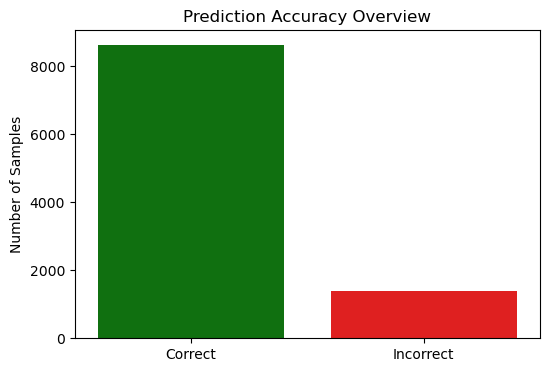

In [5]:
import pandas as pd
import string
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Download NLTK stopwords
nltk.download('stopwords')

# Load dataset
df = pd.read_csv('C:\\Users\\Student\\Downloads\\IMDB Dataset.csv')

# 1. Visualize initial sentiment distribution
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in text.split() if word not in stop_words]
    return " ".join(filtered_words)

# Apply preprocessing
df['review'] = df['review'].apply(preprocess_text)

# Vectorization
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['review'])

# Label encoding
y = df['sentiment'].map({'positive': 1, 'negative': 0})

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 3. Accuracy vs Misclassified Bar Plot
correct = (y_test == y_pred).sum()
incorrect = (y_test != y_pred).sum()

plt.figure(figsize=(6,4))
sns.barplot(x=["Correct", "Incorrect"], y=[correct, incorrect], palette=["green", "red"])
plt.title("Prediction Accuracy Overview")
plt.ylabel("Number of Samples")
plt.show()


In [6]:
pip install pandas scikit-learn nltk matplotlib seaborn wordcloud


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Student\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


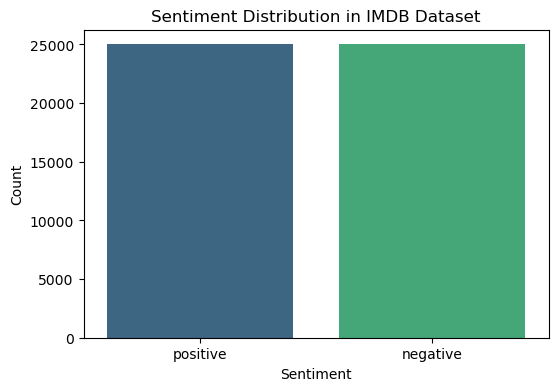

Model Accuracy: 0.74

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.68      0.73      4961
           1       0.72      0.80      0.76      5039

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.74     10000
weighted avg       0.75      0.74      0.74     10000



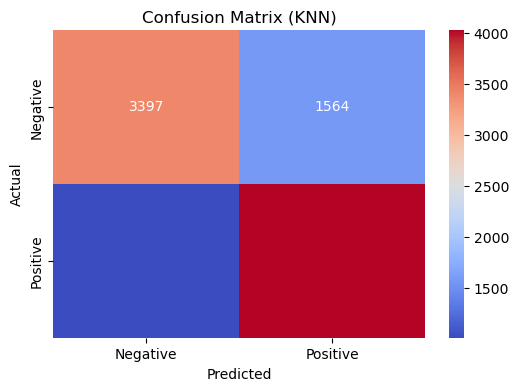

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


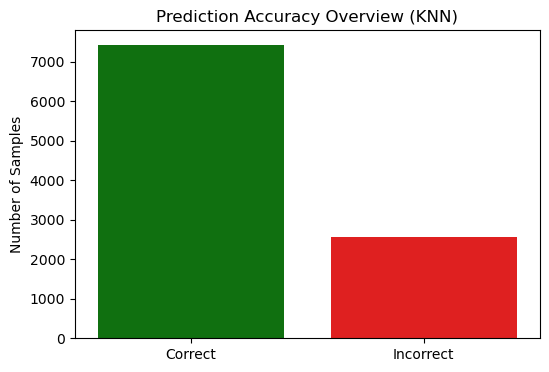

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


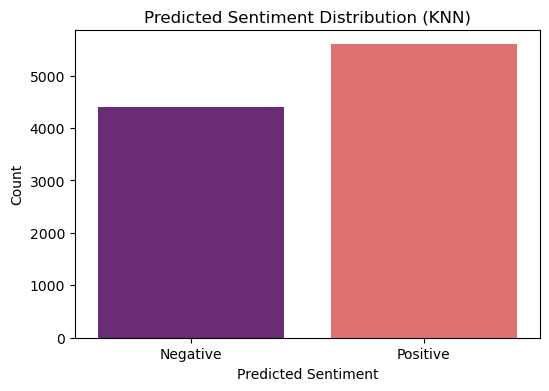

In [8]:
import pandas as pd
import string
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Download NLTK stopwords
nltk.download('stopwords')

# Load dataset
df = pd.read_csv('C:\\Users\\Student\\Downloads\\IMDB Dataset.csv')  # Ensure this file is in the same folder

# Plot sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution in IMDB Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()  # lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    stop_words = set(stopwords.words('english'))
    filtered = [word for word in text.split() if word not in stop_words]
    return " ".join(filtered)

# Apply preprocessing
df['review'] = df['review'].apply(preprocess_text)

# Convert labels
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['review']).toarray()
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix (KNN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Accuracy vs Misclassification
correct = (y_test == y_pred).sum()
incorrect = (y_test != y_pred).sum()
plt.figure(figsize=(6, 4))
sns.barplot(x=["Correct", "Incorrect"], y=[correct, incorrect], palette=["green", "red"])
plt.title("Prediction Accuracy Overview (KNN)")
plt.ylabel("Number of Samples")
plt.show()

# Positive vs Negative Predictions Visualization
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_counts = pred_df['Predicted'].value_counts().sort_index()
plt.figure(figsize=(6, 4))
sns.barplot(x=["Negative", "Positive"], y=pred_counts, palette='magma')
plt.title("Predicted Sentiment Distribution (KNN)")
plt.ylabel("Count")
plt.xlabel("Predicted Sentiment")
plt.show()
